# Computation on Arrays: Broadcasting

In [2]:
import numpy as np

In [3]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [5]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [6]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [18]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [19]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting example 1

In [23]:
M = np.ones((2, 3))
a = np.arange(3)
M, a

(array([[1., 1., 1.],
        [1., 1., 1.]]), array([0, 1, 2]))

In [26]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

(array([[1., 1., 1.],
        [1., 1., 1.]]), array([0, 1, 2]))

## Broadcasting example 2

In [27]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
a,b

(array([[0],
        [1],
        [2]]), array([0, 1, 2]))

In [28]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting example 3

In [29]:
M = np.ones((3, 2))
a = np.arange(3)

In [31]:
M,a

(array([[1., 1.],
        [1., 1.],
        [1., 1.]]), array([0, 1, 2]))

In [37]:
# M + a
# ValueError: operands could not be broadcast together with shapes (3,2) (3,) 


array([[0],
       [1],
       [2]])

In [38]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice

#### Centering an array

In [43]:
X = np.random.random((10, 3))
X

array([[0.69027944, 0.46200482, 0.06871942],
       [0.7256863 , 0.2791341 , 0.87875977],
       [0.90712076, 0.86961745, 0.32381125],
       [0.08084392, 0.07414443, 0.45028839],
       [0.77281246, 0.87477678, 0.13134816],
       [0.664878  , 0.54851451, 0.14550564],
       [0.35488345, 0.1777988 , 0.32004853],
       [0.74022141, 0.71051776, 0.62350786],
       [0.15696032, 0.43802321, 0.75146068],
       [0.36413807, 0.3864436 , 0.49826383]])

In [44]:
Xmean = X.mean(0)
Xmean

array([0.54578241, 0.48209755, 0.41917135])

In [45]:
X_centered = X - Xmean
X_centered

array([[ 0.14449702, -0.02009272, -0.35045193],
       [ 0.17990388, -0.20296345,  0.45958842],
       [ 0.36133834,  0.3875199 , -0.0953601 ],
       [-0.46493849, -0.40795312,  0.03111704],
       [ 0.22703005,  0.39267923, -0.2878232 ],
       [ 0.11909559,  0.06641696, -0.27366572],
       [-0.19089896, -0.30429874, -0.09912283],
       [ 0.194439  ,  0.22842021,  0.20433651],
       [-0.38882209, -0.04407434,  0.33228932],
       [-0.18164435, -0.09565394,  0.07909248]])

In [46]:
X_centered.mean(0)

array([ 1.11022302e-16,  0.00000000e+00, -8.32667268e-17])

#### Plotting a two-dimensional function

In [48]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [55]:
z 

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ...,
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

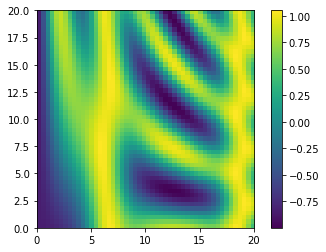

In [64]:
plt.imshow(z, origin='lower', extent=[0, 20, 0, 20], cmap='viridis')
plt.colorbar();

In [65]:
import pandas as pd
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('../datasets/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [67]:
rainfall.shape

(365,)

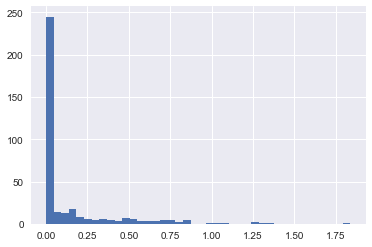

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles
plt.hist(inches, 40);